In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
dataset=pd.read_csv('../python-ml-course/datasets/auto/auto-mpg.csv')
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Ejercicio:  Encontrar los errores en el Dataset  y solucionarlos

--------------------------------------------------------------------------

In [25]:
lm=LinearRegression()
lm.fit(dataset[['horsepower']],dataset['mpg'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

--------------------------------------------------------------------------

--------------------------------------------------------------------------

--------------------------------------------------------------------------

In [22]:
dataset['horsepower']=dataset['horsepower'].fillna(dataset['horsepower'].mean()) 
dataset['mpg']=dataset['mpg'].fillna(dataset['mpg'].mean()) 

## 1- Comprobar la correlacion de las variables

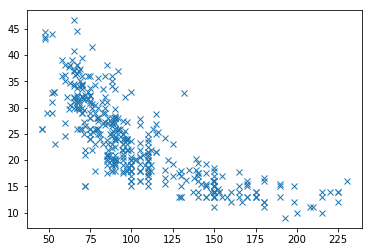

In [20]:
plt.plot(dataset[['horsepower']],dataset['mpg'],'x')

In [23]:
lm=LinearRegression()
lm.fit(dataset[['horsepower']],dataset['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

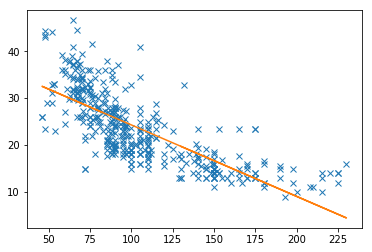

In [6]:
plt.plot(dataset['horsepower'],dataset['mpg'],'x')
plt.plot(dataset['horsepower'],lm.predict(dataset[['horsepower']]))

In [7]:
RSE= np.sqrt( sum( (dataset['mpg']-lm.predict(dataset[['horsepower']]))**2 ) / (len(dataset)-1) ) 
error=(RSE/np.mean(dataset['mpg']))*100
print('R2(Score): '+str(lm.score(dataset[['horsepower']],dataset['mpg'])))
print('RSE(Desviacion): '+str(RSE))
print('Error: '+str(error)+' %')

R2(Score): 0.574653340645025
RSE(Desviacion): 5.046879480825512
Error: 21.462773361633467 %


Como podemos observar un modelo lineal no se ajusta bien a la relación de las variables

## 2-Crear modelo de regresion polinomial

### Este proceso se puede ciclar en un bucle para ir probando con diferentes polinomios

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [9]:
poly=PolynomialFeatures(degree=2) #degree es el grado del polinomio

new_hp=poly.fit_transform(dataset[['horsepower']]) #se tiene que transformar la variable predictoria

lm2=linear_model.LinearRegression()

lm2.fit(new_hp,dataset['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

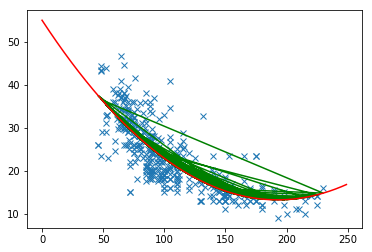

In [10]:
plt.plot(dataset['horsepower'],dataset['mpg'],'x') #datos
plt.plot(dataset['horsepower'],lm2.predict(new_hp), 'g') #predicciones

x_finals=pd.DataFrame({'A':range(250)})
y_finals=poly.fit_transform(x_finals)

plt.plot(x_finals,lm2.predict(y_finals), 'r') #prediccion simplificada

In [11]:
RSE= np.sqrt( sum( (dataset['mpg']-lm2.predict(new_hp))**2 ) / (len(dataset)-1) ) 
error=(RSE/np.mean(dataset['mpg']))*100
print('R2: '+str(lm2.score(new_hp,dataset['mpg'])))
print('RSE: '+str(RSE))
print('Error: '+str(error)+' %')

R2: 0.6439066584257469
RSE: 4.617781158036541
Error: 19.637954661906893 %


# Eliminacion de Outliers

Este metodo ayuda a eliminar los puntos que estan muy desviados para asi mejor el modelo

Una vez detectados los outliers en el plot, procedemos a filtrarlos del dataset para poder eliminarlos posteriormente

R2: 0.6261049762826918


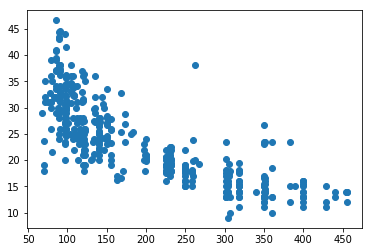

In [12]:
dataset['displacement']=dataset['displacement'].fillna(dataset['displacement'].mean())

lm=linear_model.LinearRegression()
lm.fit(dataset[['displacement']],dataset[['mpg']])

print('R2: '+str(lm.score(dataset[['displacement']],dataset[['mpg']])))

plt.plot(dataset[['displacement']],dataset[['mpg']], 'o')

In [13]:
dataset[(dataset['mpg']>35)&(dataset['displacement']>250)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [14]:
dataset[(dataset['mpg']>20)&(dataset['displacement']>350)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
12,23.514573,8,351.0,153.0,4034,11.0,70,1,ford torino (sw)
13,23.514573,8,383.0,175.0,4166,10.5,70,1,plymouth satellite (sw)
14,23.514573,8,360.0,175.0,3850,11.0,70,1,amc rebel sst (sw)


R2: 0.649899916896854


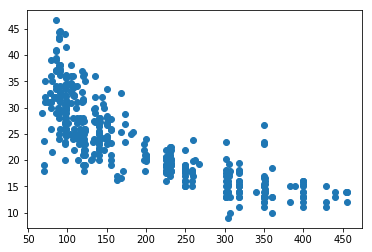

In [15]:
dataset_new=dataset.drop([395,12,13,14])

lm2=linear_model.LinearRegression()
lm2.fit(dataset_new[['displacement']],dataset_new[['mpg']])

print('R2: '+str(lm2.score(dataset_new[['displacement']],dataset_new[['mpg']])))

plt.plot(dataset_new[['displacement']],dataset_new[['mpg']], 'o')